## Readme
We use this notebook to generate training and testing images.
First we download the Flickr8k image library, which contains 8k images.  I split them into two folders 7k and 1k for training and testing, respectively, so that we ensure that the model has never seen the testing images.
Training image folder and csv file are hardcoded below.  Change to the testing image folder and csv file name to generate testing images.

In [1]:
from PIL import Image, ImageDraw
import os, math, random
from random import choice
import numpy as np
from numpy.random import uniform

def sin(a):
    return math.sin(a)
def cos(a):
    return math.cos(a)
def tan(a):
    return math.tan(a)
pi=math.pi
sq2=math.sqrt(2)


In [21]:
image_folder = './Flickr7k'
flickr_images = os.listdir(image_folder)

In [22]:
def squareimage(path, size): 
    # Resnet 18 require input image size to be 224x224 
    im = Image.open(path)
    w, h = im.size
    s = min(w, h)
    left = (w - s) // 2
    right = left + s
    top = (h - s) // 2
    bot = top + s
    return im.crop((left, top, right, bot)).resize((size,size))


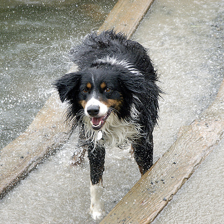

In [14]:
squareimage(image_folder + '/' + choice(flickr_images), 224)

In [15]:
def rCoords(cx,cy,s,l1,l2,angle):
    nose=(0+sq2/2*s,0)
    lFinBottom=(0+sq2/2*s-sq2/2*(s+l1),0-sq2/2*(s+l1))
    lFinTop=(0+sq2/2*s-sq2/2*(s+l1)-sq2/2*s,0-sq2/2*(s+l1)+sq2/2*s)
    spine=(0-sq2/2*s,0)
    uFinTop=(0+sq2/2*s-sq2/2*(s+l2),0+sq2/2*(s+l2))
    uFinBottom=(0+sq2/2*s-sq2/2*(s+l2)-sq2/2*s,0+sq2/2*(s+l2)-sq2/2*s)
    chevron = [nose,lFinBottom,lFinTop,spine,uFinBottom,uFinTop,nose]
    roChev=[]
    for xy in chevron:
        x=xy[0]; y=xy[1]
        roChev.append((x*cos(angle)-y*sin(angle)+cx,x*sin(angle)+y*cos(angle)+cy))
    return roChev
    
centers={}

In [16]:
def random_color():
    rgbl=[255,0,0]
    random.shuffle(rgbl)
    return tuple(rgbl)


In [23]:
output_folder = 'arrowed_train/'

files = []
sizes = []
xs = []
ys = []
coses = []
sines = []
for i in range(10000):
    s = np.random.normal()*2.5 + 15
    s = min(max(10, s), 20)
    cx = min(200, max(24, np.random.normal() * 60 + 112)) # Neural networks usually like normal distributions.
    cy = min(200, max(24, np.random.normal() * 60 + 112))
    l1 = uniform(s, s*1.5)
    l2 = uniform(l1*0.8, l1*1.2)
    angle=uniform(0,2*pi)
    color = tuple(list(np.random.choice(range(256), size=3)))
    im=squareimage(image_folder + '/' + choice(flickr_images), 224)
    draw=ImageDraw.Draw(im)
    draw.polygon(rCoords(cx,cy,s,l1,l2,angle),color, color)
    im.save(output_folder + "arrowed_"+str(i).zfill(4)+".png", "PNG")
    files.append("arrowed_"+str(i).zfill(4)+".png")
    sizes.append(s)
    xs.append(cx)
    ys.append(cy)
    coses.append(cos(angle))  # We use cos and sin as labels instead of the angle values to keep continuity.  Note that angle =0.1 and angle=359.9 are very similar but this could be very confusing to neural networks.
    sines.append(sin(angle))

import pandas as pd
df = pd.DataFrame({'files':files, 'sizes':sizes, 'x':xs, 'y':ys, 'cosA':coses, 'sinA':sines})


In [ ]:
df.set_index('files', inplace=True, drop=True)
df.to_csv('ArrowInfo_train.csv')

In [3]:
import pandas as pd
check_csv = pd.read_csv('ArrowInfo_train.csv')

In [5]:
check_csv

,files,sizes,x,y,cosA,sinA
0,arrowed_0000.png,11.234468,200.000000,112.613292,0.917450,-0.397852
1,arrowed_0001.png,11.191149,157.653643,78.385522,0.577705,-0.816245
2,arrowed_0002.png,12.632222,76.300133,103.457240,0.102580,-0.994725
3,arrowed_0003.png,13.127645,130.855935,119.797121,-0.528632,-0.848851
4,arrowed_0004.png,16.006058,122.567978,200.000000,-0.480371,-0.877065
...,...,...,...,...,...,...
9995,arrowed_9995.png,12.589679,157.976725,64.290334,0.887689,-0.460444
9996,arrowed_9996.png,17.993046,63.520471,90.308872,0.690006,-0.723804
9997,arrowed_9997.png,12.906043,98.647579,27.479796,0.411781,-0.911283
9998,arrowed_9998.png,14.550648,161.649685,112.957379,0.136623,0.990623
